# ¿Cómo realizar gráficos en Pandas?

In [1]:
import numpy as np
import pandas as pd

In [152]:
# Se utiliza el paquete matplotlib
import matplotlib.pyplot as plt
plt.close("all")

# Se define el tamaño de los gráficos por defecto
plt.rcParams["figure.figsize"] = (10, 5)

## Gráficos básicos - Función plot()

#### El método de trazado en Series y DataFrame es solo un simple envoltorio alrededor de plt.plot()

In [3]:
# Graficar una Serie
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [4]:
ts = ts.cumsum()

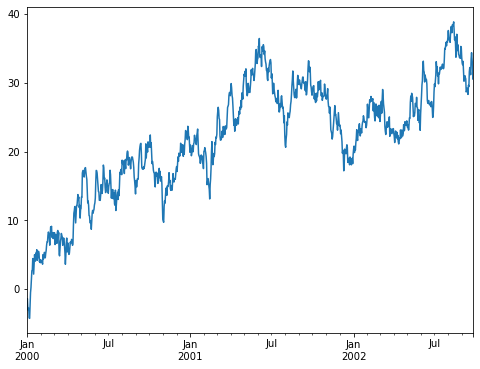

In [5]:
# Para establecer el tamaño, dentro de la función plot utilizamos el argumento: figsize=(20, 10)
ts.plot(figsize=(8, 6));

In [6]:
# Graficar un Data Frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

In [7]:
df

,A,B,C,D
2000-01-01,1.234677,-0.623398,0.359329,0.653341
2000-01-02,-1.034838,-0.425769,-1.128713,-0.488451
2000-01-03,0.180158,-0.415515,-1.332544,0.931314
2000-01-04,-1.702006,1.493202,-0.021414,0.479406
2000-01-05,1.390488,0.758102,-0.662945,-0.772184
...,...,...,...,...
2002-09-22,0.124183,0.654753,0.248529,-0.189486
2002-09-23,0.249951,-0.943653,0.173880,0.019931
2002-09-24,-0.210664,0.289929,0.841098,-0.401112
2002-09-25,-1.260197,0.513061,-1.255514,0.050426


In [8]:
df = df.cumsum()

In [9]:
plt.figure();

<Figure size 432x288 with 0 Axes>

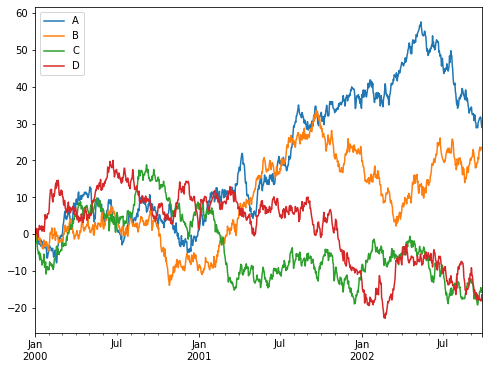

In [10]:
df.plot(figsize=(8, 6));

In [11]:
# Puede graficar una columna frente a otra utilizando las palabras clave x e y en plot():
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()

In [12]:
df3

,B,C
0,1.115473,-1.513929
1,0.211421,-1.599361
2,-0.112040,-2.141157
3,0.125963,-1.781551
4,2.157777,0.358528
...,...,...
995,9.072980,-31.533631
996,11.153934,-32.601754
997,11.554109,-33.938959
998,12.483688,-35.227357


In [13]:
df3["A"] = pd.Series(list(range(len(df))))

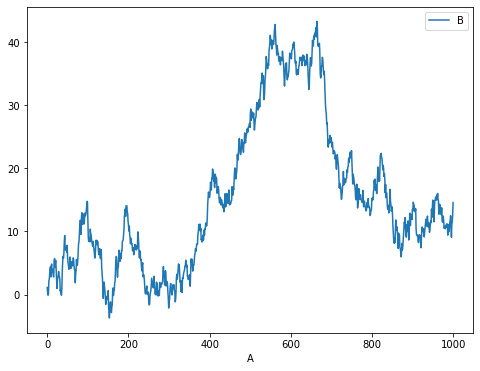

In [14]:
df3.plot(x="A", y="B", figsize=(8, 6));

## Tipos de gráfico

##### 1. 'bar' o 'barh' para diagramas de barras
##### 2. 'hist' para histograma
##### 3. 'box' para diagrama de caja
##### 4. 'kde' o 'density' para diagramas de densidad
##### 5. 'área' para parcelas de área
##### 6. 'scatter' para diagramas de dispersión
##### 7. 'hexbin' para diagramas de contenedores hexagonales
##### 8. 'pie' para diagramas circulares

In [15]:
plt.figure();

<Figure size 432x288 with 0 Axes>

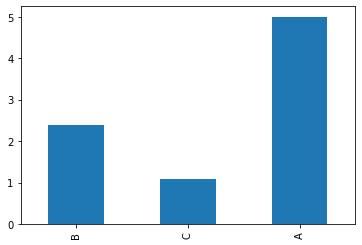

In [16]:
df3.iloc[5].plot(kind="bar");

### 1. Gráfico de barra - plot.bar() / plot.barh()

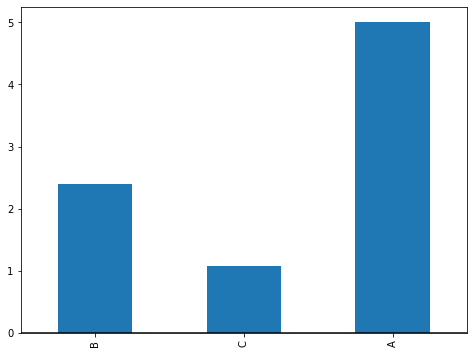

In [17]:
plt.figure(figsize=(8, 6));
df3.iloc[5].plot.bar();
plt.axhline(0, color="k");

In [18]:
# Llamar al método plot.bar() de DataFrame produce un gráfico de barras múltiples
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

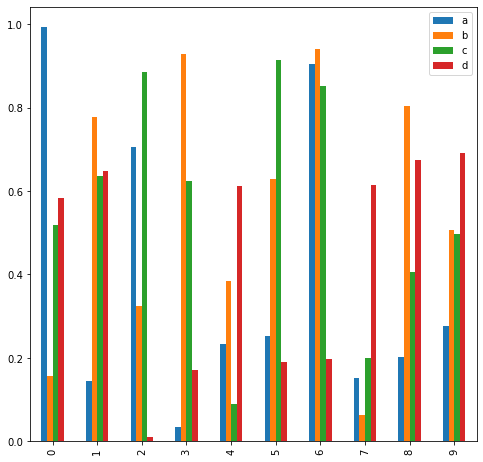

In [19]:
df2.plot.bar(figsize=(8,8));

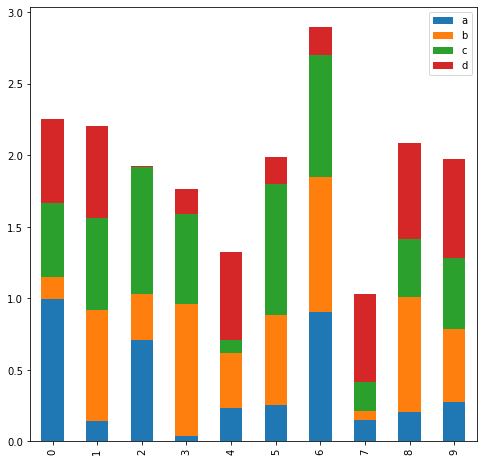

In [20]:
# Para producir un gráfico de barras apiladas, pase stacked=True
df2.plot.bar(stacked=True, figsize=(8,8));

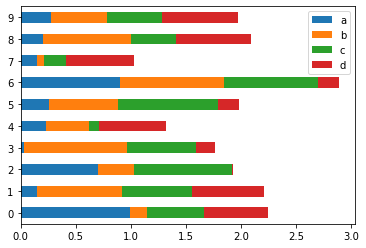

In [21]:
# Para obtener diagramas de barras horizontales, use el método barh
df2.plot.barh(stacked=True);

### 2. Histogramas - plot.hist()

In [22]:
# Los histogramas se pueden dibujar utilizando los métodos DataFrame.plot.hist() y Series.plot.hist().

In [23]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)

In [24]:
plt.figure();

<Figure size 432x288 with 0 Axes>

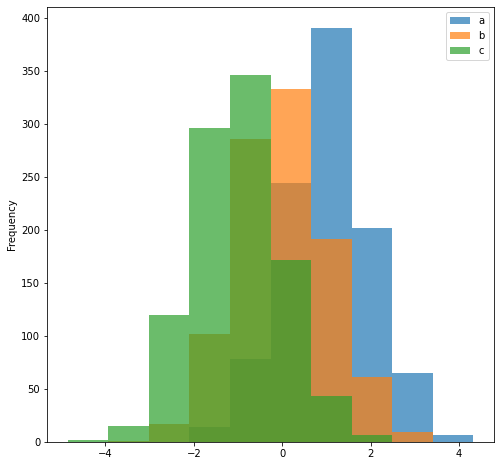

In [25]:
df4.plot.hist(alpha=0.7, figsize=(8,8));

In [26]:
# Un histograma se puede apilar usando stacked=True. El tamaño del contenedor se puede cambiar usando la palabra clave bins.
plt.figure();

<Figure size 432x288 with 0 Axes>

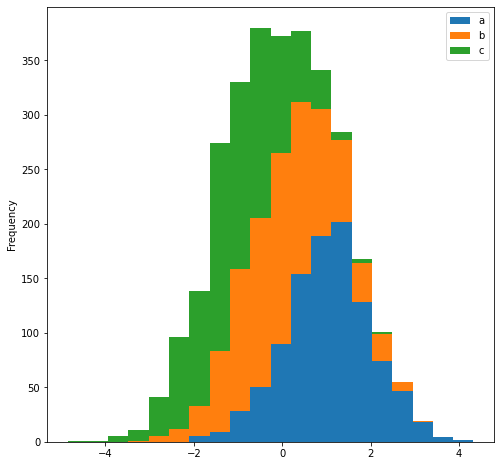

In [27]:
df4.plot.hist(stacked=True, bins=20, figsize=(8,8));

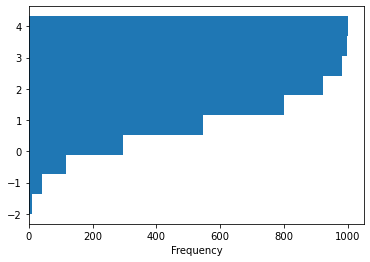

In [28]:
# Puede pasar otras palabras clave admitidas por matplotlib hist. Por ejemplo, los histogramas 
# horizontales y acumulativos se pueden dibujar mediante orientation='horizontal' and cumulative=True.
plt.figure();
df4["a"].plot.hist(orientation="horizontal", cumulative=True);

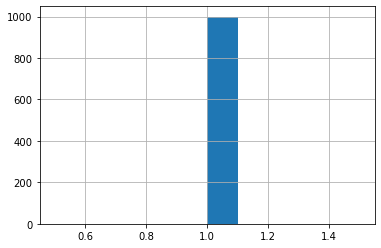

In [29]:
# Todavía se puede usar la interfaz existente DataFrame.hist para trazar el histograma.
plt.figure();
df3["A"].diff().hist();

<Figure size 432x288 with 0 Axes>

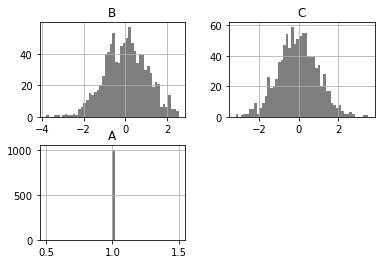

In [30]:
# DataFrame.hist() traza los histogramas de las columnas en varias subtramas
plt.figure();
df3.diff().hist(color="k", alpha=0.5, bins=50);

In [31]:
# La palabra clave by se puede especificar para trazar histogramas agrupados
data = pd.Series(np.random.randn(1000))

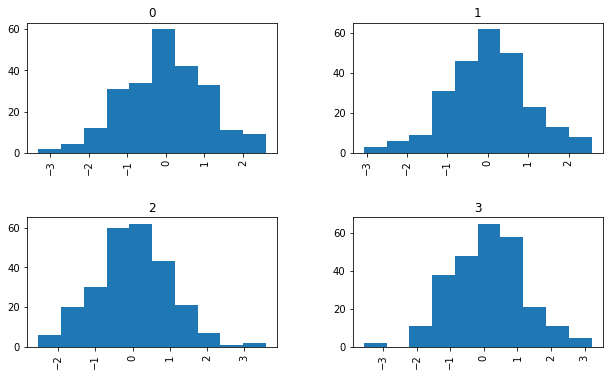

In [32]:
data.hist(by=np.random.randint(0, 4, 1000), figsize=(10, 6));

### 3. Diagramas de caja - plot.box()

In [33]:
# Boxplot se puede dibujar llamando a Series.plot.box() y DataFrame.plot.box(), 
# o DataFrame.boxplot() para visualizar la distribución de valores dentro de cada columna.
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

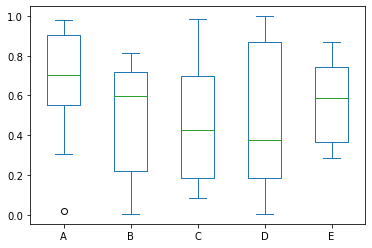

In [34]:
df.plot.box();

In [35]:
# Boxplot can be colorized by passing color keyword. You can pass a dict whose keys are boxes, 
# whiskers, medians and caps. If some keys are missing in the dict, default colors are used 
# for the corresponding artists. Also, boxplot has sym keyword to specify fliers style.
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "DarkBlue",
    "caps": "Gray",
}

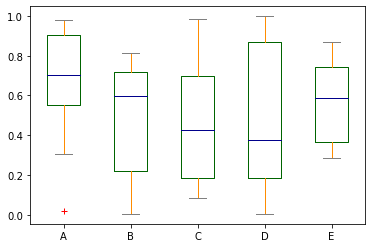

In [36]:
df.plot.box(color=color, sym="r+");

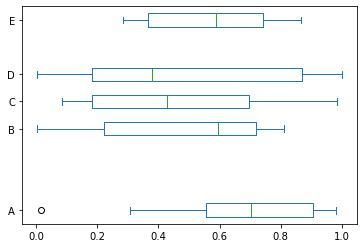

In [37]:
# El diagrama de caja horizontal y con posición personalizada se puede dibujar con vert=False y las palabras clave de posición.
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8]);

In [38]:
# Todavía se puede usar la interfaz existente DataFrame.boxplot para trazar boxplot.
df = pd.DataFrame(np.random.rand(10, 5))

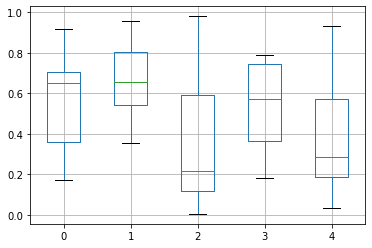

In [39]:
bp = df.boxplot()

In [40]:
# Puedes crear diagramas de caja, estratificados o por grupos, utilizando el argumento "by"
df = pd.DataFrame(np.random.rand(10, 2), columns=["Col1", "Col2"])

In [41]:
df["X"] = pd.Series(["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"])

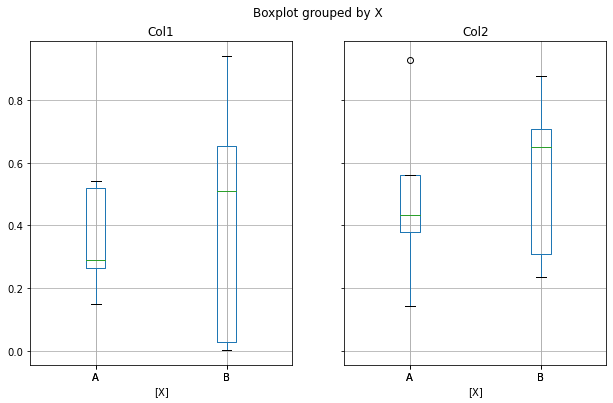

In [42]:
bp = df.boxplot(by="X", figsize=(10, 6))

### 4. Gráfico de área - plot.area()

In [43]:
# Puede crear gráficos de áreas con Series.plot.area() y DataFrame.plot.area(). 
# Los gráficos de área se apilan de forma predeterminada. Los valores nulos, seran convertidos a 0 de forma automática
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

<AxesSubplot:>

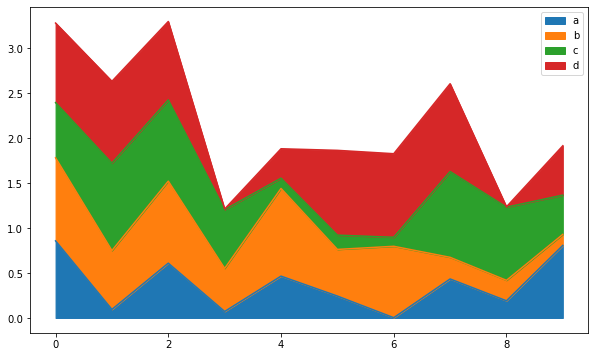

In [44]:
df.plot.area(figsize = (10,6))

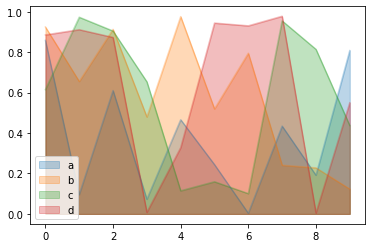

In [45]:
# Para generar un gráfico no apilado, pase stacked=False. El valor alfa se establece en 0,5 
# a menos que se especifique lo contrario
df.plot.area(stacked=False, alpha=0.3);

### 5.  Diagrama de dispersión - plot.scatter()

In [46]:
# El gráfico de dispersión se puede dibujar utilizando el método DataFrame.plot.scatter(). 
# El diagrama de dispersión requiere columnas numéricas para los ejes x e y. 
# Estos pueden ser especificados por las palabras clave x e y
df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

In [47]:
df["species"] = pd.Categorical(
    ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
)

<AxesSubplot:xlabel='a', ylabel='b'>

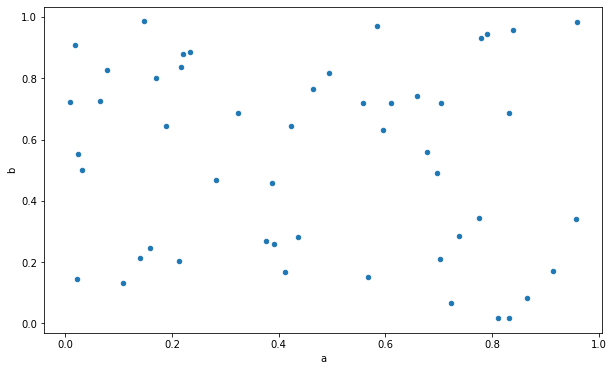

In [48]:
df.plot.scatter(x = "a", y = "b", figsize = (10,6))

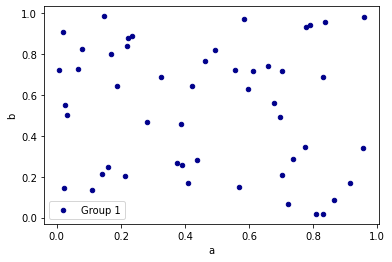

In [49]:
# Para trazar varios grupos de columnas en un solo eje, repita el método de trazado especificando el eje de destino. 
# Se recomienda especificar palabras clave de color y etiqueta para distinguir cada grupo.
ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")

In [50]:
df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax);

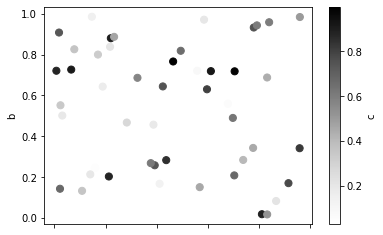

In [51]:
# La palabra clave "c" se puede dar como el nombre de una columna para proporcionar colores para cada punto
df.plot.scatter(x="a", y="b", c="c", s=50);

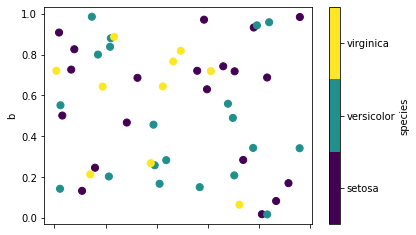

In [52]:
df.plot.scatter(x="a", y="b", c="species", cmap="viridis", s=50);

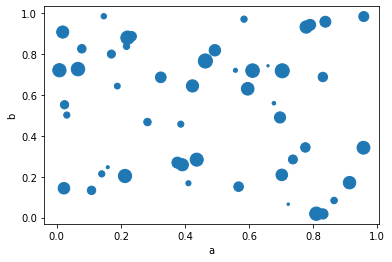

In [53]:
# Puede pasar otras palabras clave compatibles con la dispersión de matplotlib. 
# El siguiente ejemplo muestra un gráfico de burbujas que utiliza una columna de DataFrame como tamaño de burbuja.
df.plot.scatter(x="a", y="b", s=df["c"] * 200);

### 6. Gráficos de trama hexagonal - plot.hexbin() - Alternativa al scatter plot

In [54]:
# Puede crear diagramas de contenedores hexagonales con DataFrame.plot.hexbin(). Los gráficos Hexbin pueden ser una 
# alternativa útil a los gráficos de dispersión si sus datos son demasiado densos para trazar cada punto individualmente.
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

In [55]:
df["b"] = df["b"] + np.arange(1000)

<AxesSubplot:xlabel='a', ylabel='b'>

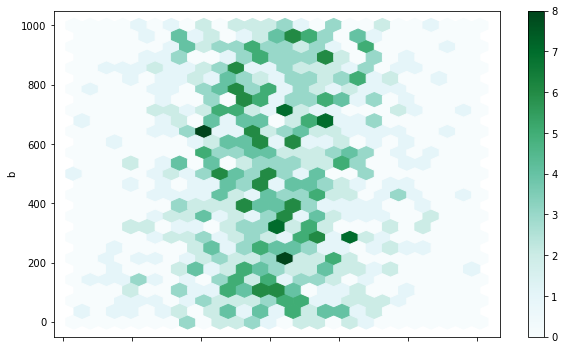

In [56]:
df.plot.hexbin( x = "a", y = "b", gridsize=25, figsize = (10,6))
# Un argumento de palabra clave útil es gridsize; controla la cantidad de hexágonos en la dirección x 
# y el valor predeterminado es 100. Un tamaño de cuadrícula más grande significa más contenedores más pequeños

In [57]:
# De forma predeterminada, se calcula un histograma de los recuentos alrededor de cada punto (x, y). 
# Puede especificar agregaciones alternativas pasando valores a los argumentos C y reduce_C_function. 
# C especifica el valor en cada punto (x, y) y reduce_C_function es una función de un argumento 
# que reduce todos los valores en un contenedor a un solo número (por ejemplo, mean, max, sum, std).
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])

In [58]:
df["b"] = df["b"] + np.arange(1000)

In [59]:
df["z"] = np.random.uniform(0, 3, 1000)

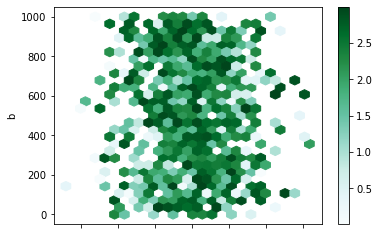

In [60]:
df.plot.hexbin(x="a", y="b", C="z", reduce_C_function=np.max, gridsize=25);

### 7. Gráfico de torta - plot.pie()

In [61]:
# Puede crear un gráfico circular con DataFrame.plot.pie() o Series.plot.pie(). 
# Si sus datos incluyen cualquier NaN, se completarán automáticamente con 0.
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

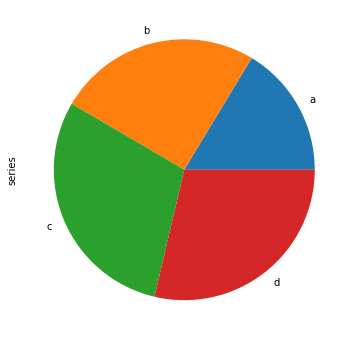

In [62]:
series.plot.pie(figsize=(6, 6));

In [63]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)

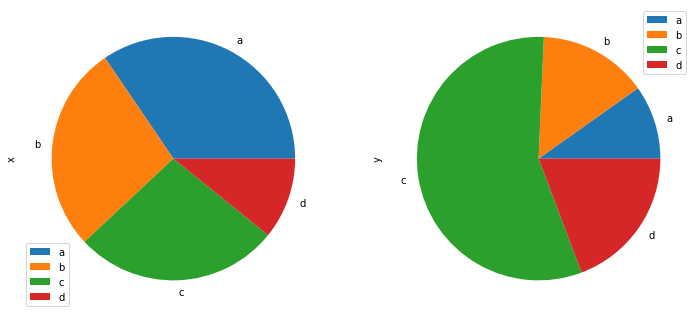

In [64]:
df.plot.pie(subplots=True, figsize=(12, 6));

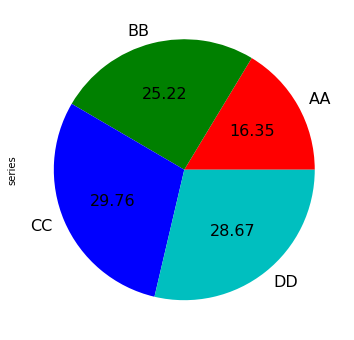

In [65]:
# Puede utilizar las palabras clave etiquetas y colores para especificar las etiquetas y los colores de cada cuña
series.plot.pie(
    labels=["AA", "BB", "CC", "DD"],
    colors=["r", "g", "b", "c"],
    autopct="%.2f",
    fontsize=16,
    figsize=(6, 6),
);

## Herramientas para graficar

#### Estas funciones se pueden importar desde pandas.plotting y pueden tomar una serie o data frame como argumento.

### 1. Scatter matrix plot - Matriz de diagramas de dispersión

In [66]:
from pandas.plotting import scatter_matrix

In [67]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])

array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

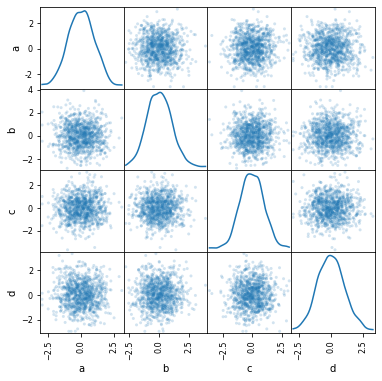

In [68]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde")

### 2. Density plot - Gráfico de densidad 

In [69]:
# Puede crear diagramas de densidad utilizando los métodos Series.plot.kde() y DataFrame.plot.kde()
ser = pd.Series(np.random.randn(1000))

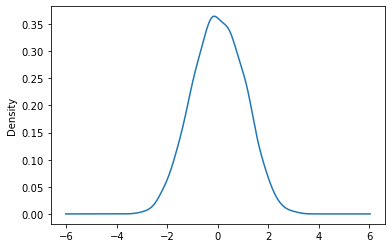

In [70]:
ser.plot.kde();

### 3. Andrews curves - Graficar clusters

In [71]:
# Las curvas de Andrews permiten trazar datos multivariados como una gran cantidad de curvas 
# que se crean utilizando los atributos de las muestras como coeficientes para las series de Fourier.
from pandas.plotting import andrews_curves

In [72]:
data = pd.read_csv("iris.csv")

In [73]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


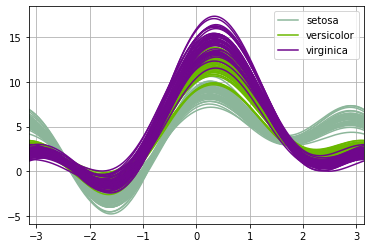

In [74]:
andrews_curves(data, "species");

### 4. Parallel coordinates - Coordenadas paralelas - Graficar clusters

In [75]:
# Las coordenadas paralelas son una técnica de trazado para datos multivariados. 
# Las coordenadas paralelas permiten ver grupos en los datos y estimar otras estadísticas visualmente. 
# Usando coordenadas paralelas, los puntos se representan como segmentos de línea conectados. 
# Cada línea vertical representa un atributo. Un conjunto de segmentos de línea conectados representa un punto de datos. 
# Los puntos que tienden a agruparse aparecerán más juntos

from pandas.plotting import parallel_coordinates

In [76]:
data = pd.read_csv("iris.csv")

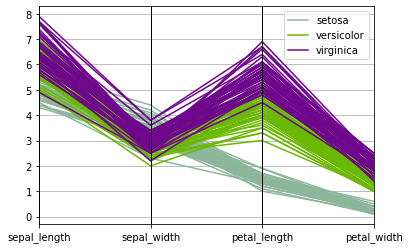

In [77]:
parallel_coordinates(data, "species");

### 5. Lag Plot - Gráfico para series de tiempo

In [78]:
# Los diagramas de retraso se utilizan para verificar si un conjunto de datos o una serie de tiempo es aleatorio. 
# Los datos aleatorios no deben exhibir ninguna estructura en el diagrama de retraso. 
# La estructura no aleatoria implica que los datos subyacentes no son aleatorios.
from pandas.plotting import lag_plot

In [79]:
spacing = np.linspace(-99 * np.pi, 99 * np.pi, num=1000)

In [80]:
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(spacing))

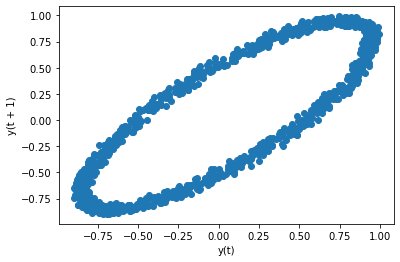

In [81]:
lag_plot(data);

### 6. Autocorrelation plot - Gráfico de autocorrelación

In [82]:
# Los gráficos de autocorrelación se utilizan a menudo para comprobar la aleatoriedad en series temporales. 
# Esto se hace calculando autocorrelaciones para valores de datos en diferentes retrasos de tiempo. 
# Si la serie de tiempo es aleatoria, tales autocorrelaciones deberían estar cerca de cero para todas 
# y cada una de las separaciones de retardo de tiempo. Si la serie temporal no es aleatoria, 
# una o más de las autocorrelaciones serán significativamente distintas de cero.
# Las líneas horizontales que se muestran en el gráfico corresponden a bandas de confianza del 95 % y 99 %. 
# La línea discontinua es una banda de confianza del 99%.
from pandas.plotting import autocorrelation_plot

In [83]:
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)

In [84]:
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))

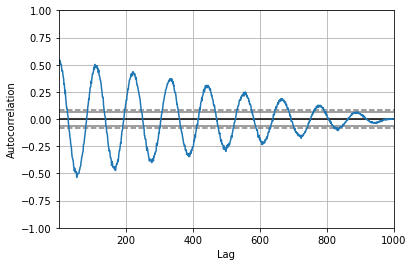

In [85]:
autocorrelation_plot(data);

### 7. Bootstrap plot

In [86]:
# Los gráficos Bootstrap se utilizan para evaluar visualmente la incertidumbre de una estadística, 
# como la media, la mediana, el rango medio, etc.
from pandas.plotting import bootstrap_plot

In [87]:
data = pd.Series(np.random.rand(1000))

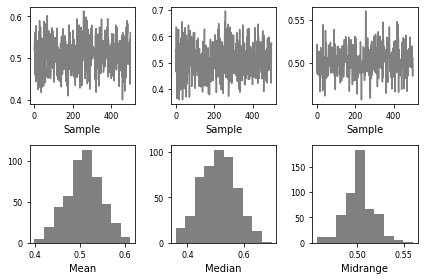

In [88]:
bootstrap_plot(data, size=50, samples=500, color="grey");

### 8. RadViz - Vizualizar datos multivariables

In [89]:
# RadViz es una forma de visualizar datos de múltiples variables. Se basa en un algoritmo simple de minimización 
# de la tensión del resorte. Básicamente configuras un montón de puntos en un plano. 
# En nuestro caso, están igualmente espaciados en un círculo unitario. Cada punto representa un único atributo. 
# Luego simula que cada muestra en el conjunto de datos está unida a cada uno de estos puntos por un resorte, 
# cuya rigidez es proporcional al valor numérico de ese atributo (están normalizados al intervalo unitario).
from pandas.plotting import radviz

In [90]:
data = pd.read_csv("iris.csv")

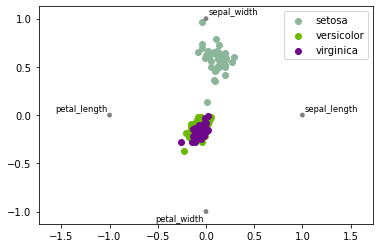

In [91]:
radviz(data, "species");

## Formatos del gráfico

#### Configurar el estilo es tan fácil como llamar a matplotlib.style.use(my_plot_style) antes de crear su gráfico. Por ejemplo, podría escribir matplotlib.style.use('ggplot') para diagramas de estilo ggplot.

### 1. Argumentos generales de estilo para el ploteo

<AxesSubplot:>

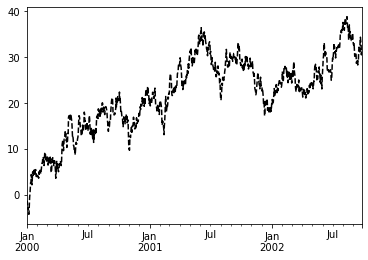

In [93]:
# La mayoría de los métodos de trazado tienen un conjunto de argumentos de palabras clave 
# que controlan el diseño y el formato del gráfico devuelto.
plt.figure();
ts.plot(style = "k--", label = "Series")

### 2. Controlando la leyenda

In [94]:
# Puede establecer el argumento de la leyenda en "False" para ocultar la leyenda, que se muestra de forma predeterminada.
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

In [95]:
df = df.cumsum()

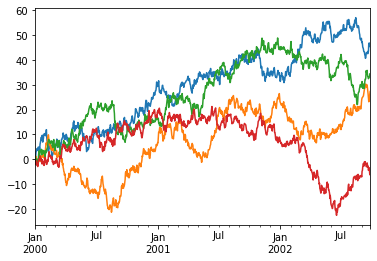

In [96]:
df.plot(legend=False);

### 3. Contralando las etiquetas

<AxesSubplot:xlabel='Eje X', ylabel='Eje Y'>

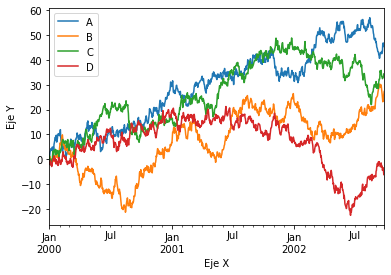

In [97]:
# Puede configurar los argumentos xlabel e ylabel para dar etiquetas personalizadas a la gráfica 
# para los ejes x e y. De forma predeterminada, pandas seleccionará el nombre del índice como xlabel, 
# y lo dejará vacío para ylabel
df.plot(xlabel = "Eje X", ylabel = "Eje Y")

### 4. Escalas

In [98]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [99]:
ts = np.exp(ts.cumsum())

<AxesSubplot:>

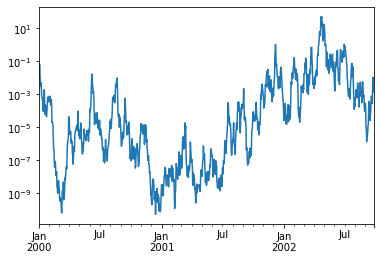

In [100]:
ts.plot(logy=True)

### 5. Graficando un eje secundario 

<AxesSubplot:>

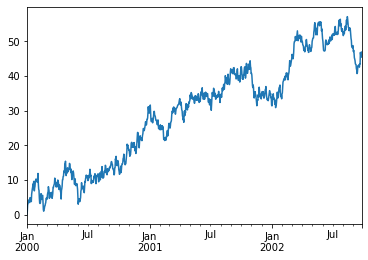

In [102]:
df["A"].plot()

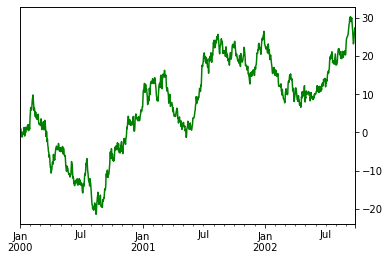

In [103]:
# Para trazar datos en un eje y secundario, use la palabra clave secondary_y=True
# Ahora selecionamos B y la asigamos como eje secundario
df["B"].plot(secondary_y=True, style="g");

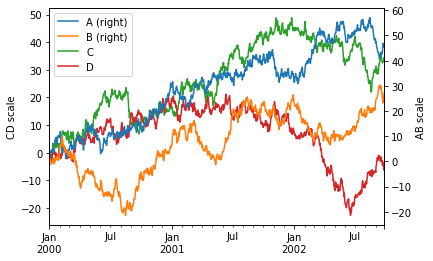

In [105]:
# Otro ejemplo, se indica como asignar la etiqueta a cada eje
ax = df.plot(secondary_y=["A", "B"])
ax.set_ylabel("CD scale");
ax.right_ax.set_ylabel("AB scale");

<AxesSubplot:>

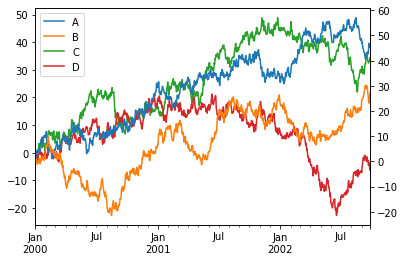

In [106]:
# Tenga en cuenta que las columnas trazadas en el eje y secundario se marcan automáticamente con "(right)" en la leyenda. 
# Para desactivar el marcado automático, utilice la palabra clave mark_right=False
df.plot(secondary_y=["A", "B"], mark_right=False)

### 6. Formato para Series de tiempo

<AxesSubplot:>

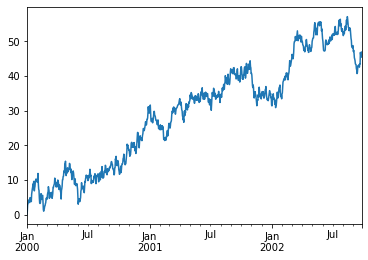

In [109]:
# Supresión del ajuste de resolución de marcas - x_compat=True
df["A"].plot()

<AxesSubplot:>

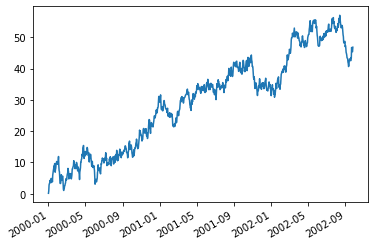

In [110]:
df["A"].plot(x_compat=True)

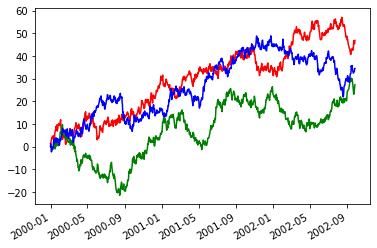

In [112]:
# Si tiene más de un gráfico que debe suprimirse, el método de uso en pandas.plotting.plot_params 
# se puede usar en una declaración with
with pd.plotting.plot_params.use("x_compat", True):
    df["A"].plot(color="r")
    df["B"].plot(color="g")
    df["C"].plot(color="b")

### 7. Subplots 

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

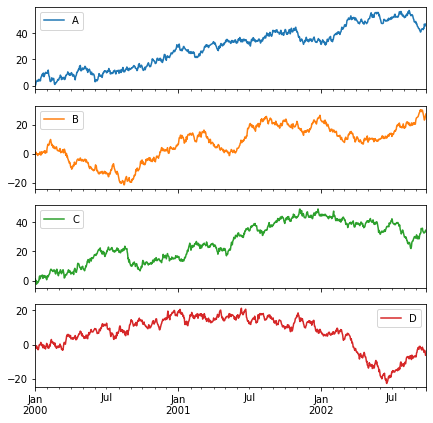

In [114]:
# Cada Serie en un DataFrame se puede trazar en un eje diferente con la palabra clave subplots
df.plot(subplots = True, figsize = (7,7))

### 8. Graficar varios gráficos de forma simúltanea

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

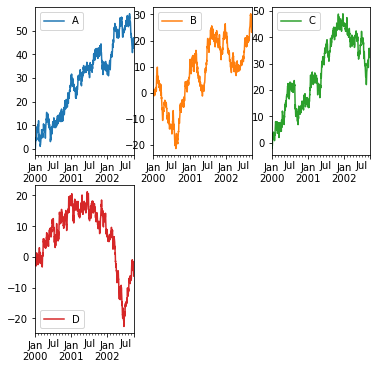

In [116]:
# El diseño de las subparcelas se puede especificar mediante la palabra clave de diseño. 
# Puede aceptar (filas, columnas). La palabra clave de diseño también se puede usar en hist y boxplot. 
# Si la entrada no es válida, se generará un ValueError
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

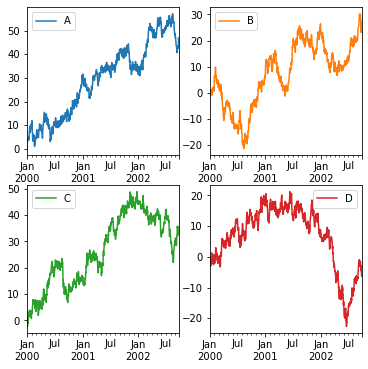

In [118]:
# También puede hacerse de esta forma
df.plot(subplots=True, layout=(2, -1), figsize=(6, 6), sharex=False)

### 9. Gráfico de barras de error - xerr y yerr

In [119]:
# El trazado con barras de error es compatible con DataFrame.plot() y Series.plot().
# Se pueden proporcionar barras de error horizontales y verticales a los argumentos de palabras clave xerr y yerr para plot()
ix3 = pd.MultiIndex.from_arrays(
    [
        ["a", "a", "a", "a", "a", "b", "b", "b", "b", "b"],
        ["foo", "foo", "foo", "bar", "bar", "foo", "foo", "bar", "bar", "bar"],
    ],
    names=["letter", "word"],
)

In [120]:
df3 = pd.DataFrame(
    {
        "data1": [9, 3, 2, 4, 3, 2, 4, 6, 3, 2],
        "data2": [9, 6, 5, 7, 5, 4, 5, 6, 5, 1],
    },
    index=ix3,
)

In [121]:
# Agrupe por etiquetas de índice y tome las medias y las desviaciones estándar para cada grupo
gp3 = df3.groupby(level=("letter", "word"))

In [122]:
means = gp3.mean()

In [123]:
errors = gp3.std()

In [124]:
means

data1     data2
letter word                    
a      bar   3.500000  6.000000
       foo   4.666667  6.666667
b      bar   3.666667  4.000000
       foo   3.000000  4.500000

In [125]:
errors

data1     data2
letter word                    
a      bar   0.707107  1.414214
       foo   3.785939  2.081666
b      bar   2.081666  2.645751
       foo   1.414214  0.707107

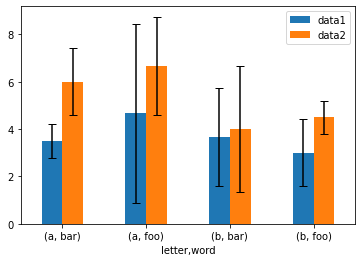

In [128]:
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax, capsize=4, rot=0);

In [129]:
# Aquí hay un ejemplo de una forma de trazar el rango mínimo/máximo usando barras de error asimétricas.
mins = gp3.min()
maxs = gp3.max()

In [130]:
# Los errores deben ser positivos y definidos en el orden de menor, mayor
errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in df3.columns]

<AxesSubplot:xlabel='letter,word'>

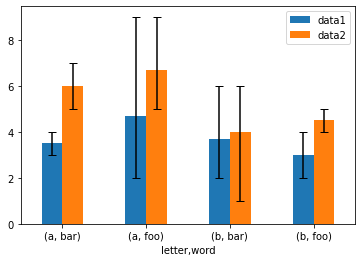

In [131]:
fig, ax = plt.subplots()
means.plot.bar(yerr=errors, ax=ax, capsize=4, rot=0)

### 10. Graficar con la tabla en el grafico - table=True

<AxesSubplot:>

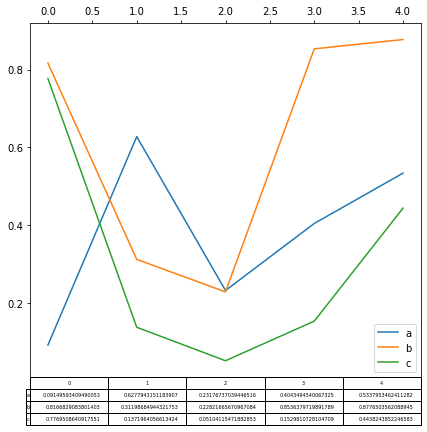

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6.5)) # Tamaño de la figura
df = pd.DataFrame(np.random.rand(5, 3), columns=["a", "b", "c"]) # Tabla de datos
ax.xaxis.tick_top() # Marcas de eje
df.plot(table=True, ax=ax) # Plotear con la tabla

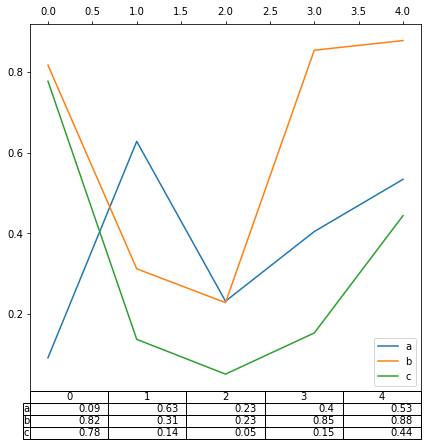

In [140]:
# Además, puede pasar un DataFrame o Serie diferente a la palabra clave de la tabla.
fig, ax = plt.subplots(1, 1, figsize=(7, 6.75))
ax.xaxis.tick_top()  # Display x-axis ticks on top.
df.plot(table=np.round(df.T, 2), ax=ax);

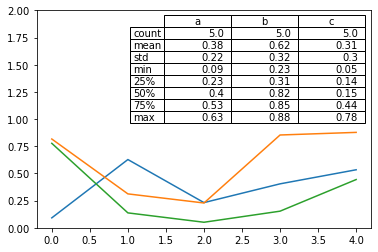

In [141]:
# También existe una función auxiliar pandas.plotting.table, que crea una tabla a partir de DataFrame o Series 
# y la agrega a una instancia de matplotlib.Axes.

from pandas.plotting import table

fig, ax = plt.subplots(1, 1)

table(ax, np.round(df.describe(), 2), loc="upper right", colWidths=[0.2, 0.2, 0.2]);

df.plot(ax=ax, ylim=(0, 2), legend=None);

### 11. Colores del gráfico - colormap

In [142]:
# Un posible problema al trazar una gran cantidad de columnas es que puede ser difícil distinguir 
# algunas series debido a la repetición en los colores predeterminados. Para remediar esto, el trazado de 
# DataFrame admite el uso del argumento de mapa de colores, que acepta un mapa de colores 
# de Matplotlib o una cadena que es el nombre de un mapa de colores registrado con Matplotlib.
df = pd.DataFrame(np.random.randn(1000, 10), index=ts.index)

In [143]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

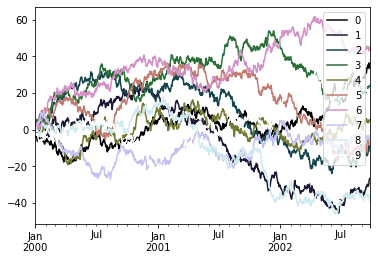

In [144]:
plt.figure();
df.plot(colormap="cubehelix");

<Figure size 432x288 with 0 Axes>

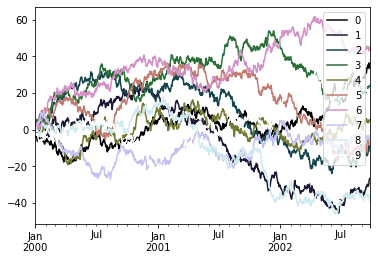

In [146]:
# Podemos importar directamente el paquete de "colormaps"

from matplotlib import cm
plt.figure();
df.plot(colormap=cm.cubehelix);

<Figure size 432x288 with 0 Axes>

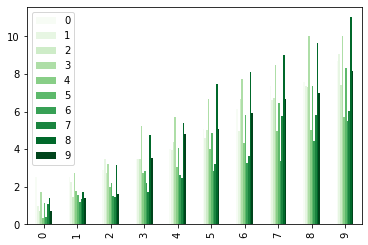

In [149]:
# Los mapas de colores también se pueden usar en otros tipos de gráficos, como gráficos de barras
dd = pd.DataFrame(np.random.randn(10, 10)).applymap(abs)
dd = dd.cumsum()
plt.figure();
dd.plot.bar(colormap="Greens");

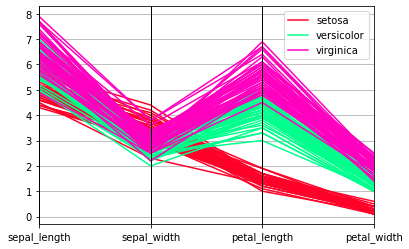

In [150]:
plt.figure();
parallel_coordinates(data, "species", colormap="gist_rainbow");

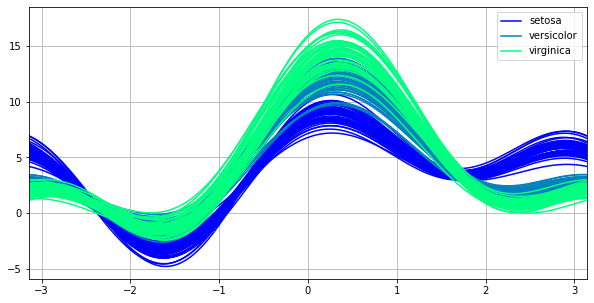

In [153]:
plt.figure();
andrews_curves(data, "species", colormap="winter");